<a href="https://colab.research.google.com/github/20522182/Basic_Machine_Learning/blob/main/LAP04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#python cơ bản

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data[:, :2] # đối với X, ta chỉ sử dụng 2 thuộc tính sepal length và sepal width để dự đoán cho dữ liệu.
y = iris.target # y: nhãn, gồm 3 nhãn

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

     Training Set
Setosa: 39.000000
Versicolour: 43.000000
Virginica: 38.000000


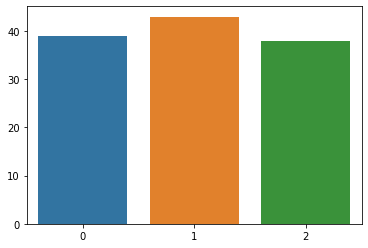

In [35]:
#-----Bài 1: Thống kê SL nhãn trên training và test, Vẽ biểu đồ phân bố---------
import numpy as np
import seaborn as sns


#Thống kê SL nhãn trên training
print('     Training Set')
train_setosa=X_train[y_train==0,:]
print ('Setosa: %f' %len(train_setosa))
train_Versicolour=X_train[y_train==1,:]
print ('Versicolour: %f' %len(train_Versicolour))
train_Virginica=X_train[y_train==2,:]
print ('Virginica: %f' %len(train_Virginica))

count = np.unique(y_train, return_counts=True)
sns.barplot(x=count[0], y=count[1])





      Test Set
Setosa: 11.000000
Versicolour: 7.000000
Virginica: 12.000000


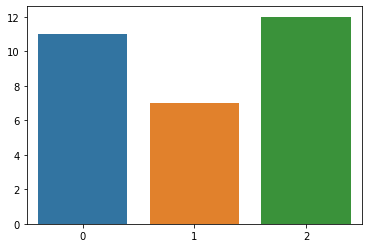

In [36]:
#Thống kê SL nhãn trên test
print('      Test Set')
test_setosa=X_test[y_test==0,:]
print ('Setosa: %f' %len(test_setosa))
test_Versicolour=X_test[y_test==1,:]
print ('Versicolour: %f' %len(test_Versicolour))
test_Virginica=X_test[y_test==2,:]
print ('Virginica: %f' %len(test_Virginica))

count = np.unique(y_test, return_counts=True)
sns.barplot(x=count[0], y=count[1])

In [6]:
#------Bài 2: Huấn luyện mô hình LogisRegress---------
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
# Tính độ chính xác
from sklearn.metrics import accuracy_score
accuracy_Logis=accuracy_score(y_test, y_pred)*100

In [7]:
#------Bài 3: Huấn luyện mô hình KNN -> SS độ chính xác với LR
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred_KNN = classifier.predict(X_test)
# Tính độ chính xác
accuracy_KNN=accuracy_score(y_pred_KNN, y_test)*100
print('KNN accuracy: %f' %accuracy_KNN)
print('Logis accuracy: %f' %accuracy_Logis)


KNN accuracy: 66.666667
Logis accuracy: 76.666667


In [8]:
#---Bài 4: Đánh giá 2 mô hình = precision_score, recall_score
#----------và f1_score sử dụng macro average.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Mô hình LogisticRegress
print('   LogisticRegress')
        # Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
        # Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
        # Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# Mô hình KNN
print('       KNN')
        # Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_KNN, average='macro')
print('Precision: %f' % precision)
        # Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_KNN, average='macro')
print('Recall: %f' % recall)
        # Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_KNN, average='macro')
print('F1 score: %f' % f1)

   LogisticRegress
Precision: 0.785714
Recall: 0.785714
F1 score: 0.754386
       KNN
Precision: 0.683761
Recall: 0.682540
F1 score: 0.648148
